# **Exploratory Data Analysis (EDA) Secondary Mushroom**

Dataset : (https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset)

### **LOADING DATA AND PACKAGE**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url = "/content/drive/MyDrive/UTS_BIG_DATA/MushroomDataset/secondary_data.csv"

In [ ]:
df = pd.read_csv(url, sep=';')

In [ ]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


### **Data Wrangling and Cleaning**

In [ ]:
df.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [ ]:
cap_shape={"b": "bell", "c": "conical", "x": "convex", "f": "flat", "p": "spherical", "s": "sunken", "o": "others"}
df["cap-shape"]=df["cap-shape"].replace(cap_shape)

cap_surface={"i": "fibrous", "g": "grooves", "y": "scaly", "s": "smooth","h": "shiny", "l": "leathery", "k": "silky", "t": "sticky", "w": "wrinkled", "e": "fleshy"}
df["cap-surface"]=df["cap-surface"].replace(cap_surface)

cap_color={"n": "brown", "b": "buff", "g": "gray", "r": "green", "p": "pink", "u": "purple", "e": "red", "w": "white", "y": "yellow", "l": "blue", "f": "none", "o": "orange","k":"black"}
df["cap-color"]=df["cap-color"].replace(cap_color)

bruises={"t":"bruises","f":"no"}
df["does-bruise-or-bleed"]=df["does-bruise-or-bleed"].replace(bruises)

gill_attachment={"a": "adnate", "x": "adnexed", "d": "decurrent", "e": "free", "s": "sinuate", "p": "pores", "f": "none", "?": "unknown"}
df["gill-attachment"]=df["gill-attachment"].replace(gill_attachment)

gill_spacing={"c": "close", "d":"distant", "f": "none"}
df["gill-spacing"]=df["gill-spacing"].replace(gill_spacing)

df["gill-color"]=df["gill-color"].replace(cap_color)

df["stem-color"]=df["stem-color"].replace(cap_color)

veil_type={"p": "partial", "u": "universal"}
df["veil-type"]=df["veil-type"].replace(veil_type)

df["veil-color"]=df["veil-color"].replace(cap_color)

has_ring={"t": "ring", "f": "none"}
df["has-ring"]=df["has-ring"].replace(has_ring)

ring_type={"c": "cobwebby", "e": "evanescent", "r": "flaring", "g": "grooved", "l": "large", "p": "pendant", "s": "sheathing", "z": "zone", "y": "scaly", "m": "movable", "f": "none", "?": "unknown"}
df["ring-type"]=df["ring-type"].replace(ring_type)

df["spore-print-color"]=df["spore-print-color"].replace(cap_color)

habitat={"g": "grasses", "l": "leaves", "m": "meadows", "p": "paths", "h": "heaths", "u": "urban", "w": "waste", "d": "woods"}
df["habitat"]=df["habitat"].replace(habitat)

season={"s": "spring", "u": "summer", "a": "autumn", "w": "winter"}
df["season"]=df["season"].replace(season)

classs={"e":"edible","p":"poisonous"}
df["class"]=df["class"].replace(classs)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [ ]:
df.duplicated().sum()

np.int64(146)

In [ ]:
df = df.drop_duplicates()
df.reset_index(drop=True)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,poisonous,15.26,convex,grooves,orange,no,free,NaN,white,16.95,...,s,y,white,universal,white,ring,grooved,NaN,woods,winter
1,poisonous,16.60,convex,grooves,orange,no,free,NaN,white,17.99,...,s,y,white,universal,white,ring,grooved,NaN,woods,summer
2,poisonous,14.07,convex,grooves,orange,no,free,NaN,white,17.80,...,s,y,white,universal,white,ring,grooved,NaN,woods,winter
3,poisonous,14.17,flat,shiny,red,no,free,NaN,white,15.77,...,s,y,white,universal,white,ring,pendant,NaN,woods,winter
4,poisonous,14.64,convex,shiny,orange,no,free,NaN,white,16.53,...,s,y,white,universal,white,ring,pendant,NaN,woods,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60918,poisonous,1.18,sunken,smooth,yellow,no,none,none,none,3.93,...,NaN,NaN,yellow,NaN,NaN,none,none,NaN,woods,autumn
60919,poisonous,1.27,flat,smooth,yellow,no,none,none,none,3.18,...,NaN,NaN,yellow,NaN,NaN,none,none,NaN,woods,autumn
60920,poisonous,1.27,sunken,smooth,yellow,no,none,none,none,3.86,...,NaN,NaN,yellow,NaN,NaN,none,none,NaN,woods,summer
60921,poisonous,1.24,flat,smooth,yellow,no,none,none,none,3.56,...,NaN,NaN,yellow,NaN,NaN,none,none,NaN,woods,summer


In [ ]:
numeric = df.select_dtypes("number")
numeric

,cap-diameter,stem-height,stem-width
0,15.26,16.95,17.09
1,16.60,17.99,18.19
2,14.07,17.80,17.74
3,14.17,15.77,15.98
4,14.64,16.53,17.20
...,...,...,...
61064,1.18,3.93,6.22
61065,1.27,3.18,5.43
61066,1.27,3.86,6.37
61067,1.24,3.56,5.44


In [ ]:
numeric.isnull().sum()

,0
cap-diameter,0
stem-height,0
stem-width,0


**No missing values in numeric**

In [ ]:
df.describe()

,cap-diameter,stem-height,stem-width
count,60923.000000,60923.000000,60923.000000
mean,6.741957,6.597202,12.178484
std,5.268435,3.358757,10.030361
min,0.380000,0.000000,0.000000
25%,3.490000,4.650000,5.250000
50%,5.880000,5.960000,10.220000
75%,8.550000,7.750000,16.580000
max,62.340000,33.920000,103.910000


In [ ]:
cat = df.select_dtypes("object")
cat

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,poisonous,convex,grooves,orange,no,free,NaN,white,s,y,white,universal,white,ring,grooved,NaN,woods,winter
1,poisonous,convex,grooves,orange,no,free,NaN,white,s,y,white,universal,white,ring,grooved,NaN,woods,summer
2,poisonous,convex,grooves,orange,no,free,NaN,white,s,y,white,universal,white,ring,grooved,NaN,woods,winter
3,poisonous,flat,shiny,red,no,free,NaN,white,s,y,white,universal,white,ring,pendant,NaN,woods,winter
4,poisonous,convex,shiny,orange,no,free,NaN,white,s,y,white,universal,white,ring,pendant,NaN,woods,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,poisonous,sunken,smooth,yellow,no,none,none,none,NaN,NaN,yellow,NaN,NaN,none,none,NaN,woods,autumn
61065,poisonous,flat,smooth,yellow,no,none,none,none,NaN,NaN,yellow,NaN,NaN,none,none,NaN,woods,autumn
61066,poisonous,sunken,smooth,yellow,no,none,none,none,NaN,NaN,yellow,NaN,NaN,none,none,NaN,woods,summer
61067,poisonous,flat,smooth,yellow,no,none,none,none,NaN,NaN,yellow,NaN,NaN,none,none,NaN,woods,summer


In [ ]:
print("Missing values in each column:\n")
print(cat.isnull().mean().sort_values(ascending=False))

Missing values in each column:

veil-type               0.947852
spore-print-color       0.896164
veil-color              0.878322
stem-root               0.845920
stem-surface            0.625741
gill-spacing            0.411372
cap-surface             0.231768
gill-attachment         0.161762
ring-type               0.040559
class                   0.000000
cap-shape               0.000000
gill-color              0.000000
cap-color               0.000000
does-bruise-or-bleed    0.000000
has-ring                0.000000
stem-color              0.000000
habitat                 0.000000
season                  0.000000
dtype: float64


In [ ]:
df.drop(columns=['veil-type', 'spore-print-color', 'veil-color', 'stem-root', 'stem-surface'], inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

df[['gill-spacing', 'cap-surface', 'gill-attachment', 'ring-type']] = imputer.fit_transform(
    df[['gill-spacing', 'cap-surface', 'gill-attachment', 'ring-type']]
)


In [ ]:
df.head(5)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,poisonous,15.26,convex,grooves,orange,no,free,close,white,16.95,17.09,white,ring,grooved,woods,winter
1,poisonous,16.60,convex,grooves,orange,no,free,close,white,17.99,18.19,white,ring,grooved,woods,summer
2,poisonous,14.07,convex,grooves,orange,no,free,close,white,17.80,17.74,white,ring,grooved,woods,winter
3,poisonous,14.17,flat,shiny,red,no,free,close,white,15.77,15.98,white,ring,pendant,woods,winter
4,poisonous,14.64,convex,shiny,orange,no,free,close,white,16.53,17.20,white,ring,pendant,woods,winter


In [ ]:
# Cek setelah dilakukan fill NaN
df.isnull().sum()

,0
class,0
cap-diameter,0
cap-shape,0
cap-surface,0
cap-color,0
does-bruise-or-bleed,0
gill-attachment,0
gill-spacing,0
gill-color,0
stem-height,0


## **1. Univariate Visual Analysis**

### **A. Quantitative features**

**Histograms and density plots**

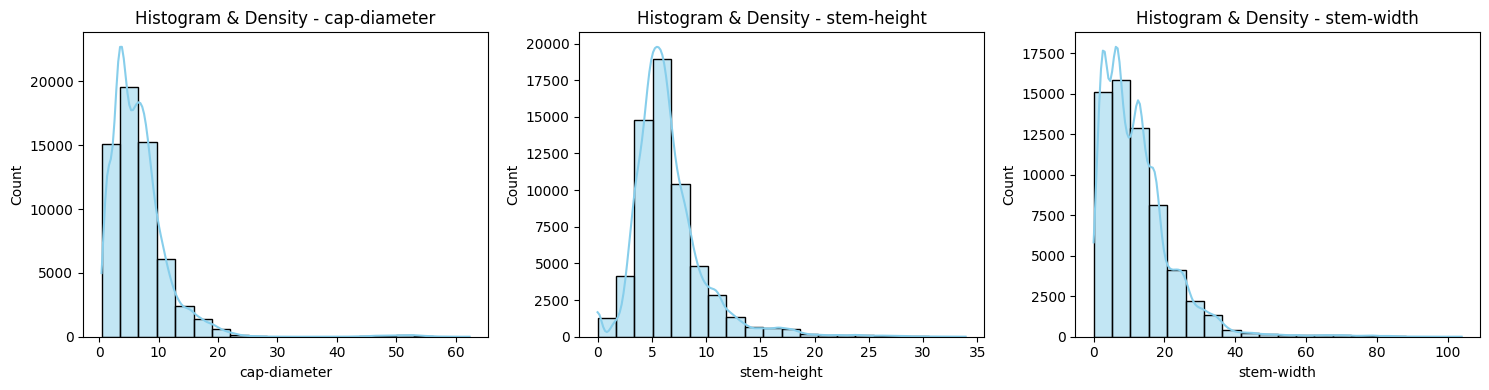

In [ ]:
# List fitur numerik
quant_features = ['cap-diameter', 'stem-height', 'stem-width']

# Plot histogram + density
plt.figure(figsize=(15, 4))
for i, feature in enumerate(quant_features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[feature], kde=True, color='skyblue', bins=20)
    plt.title(f'Histogram & Density - {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Box plot**

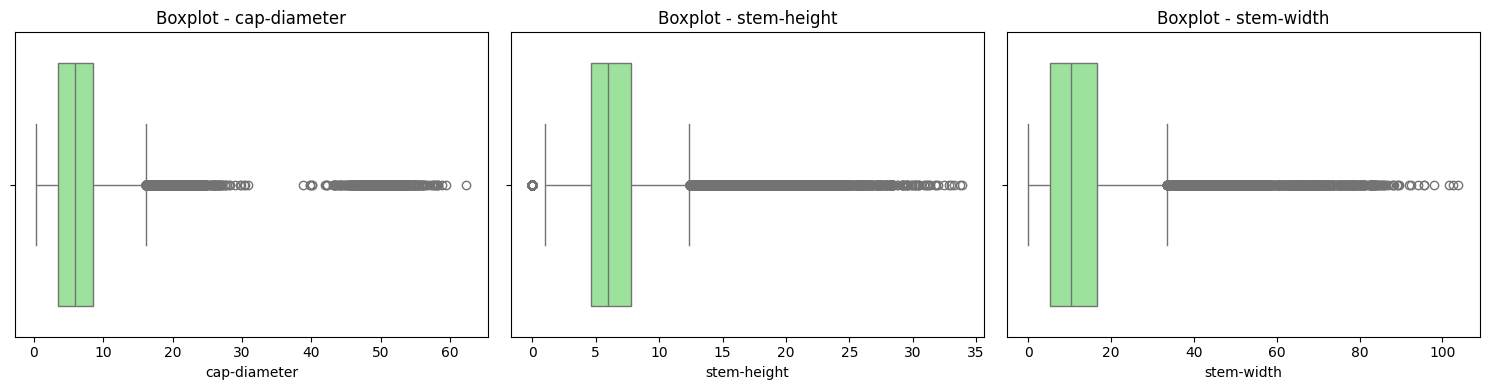

In [ ]:
plt.figure(figsize=(15, 4))
for i, feature in enumerate(quant_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df, x=feature, color='lightgreen')
    plt.title(f'Boxplot - {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

**Violin plot**

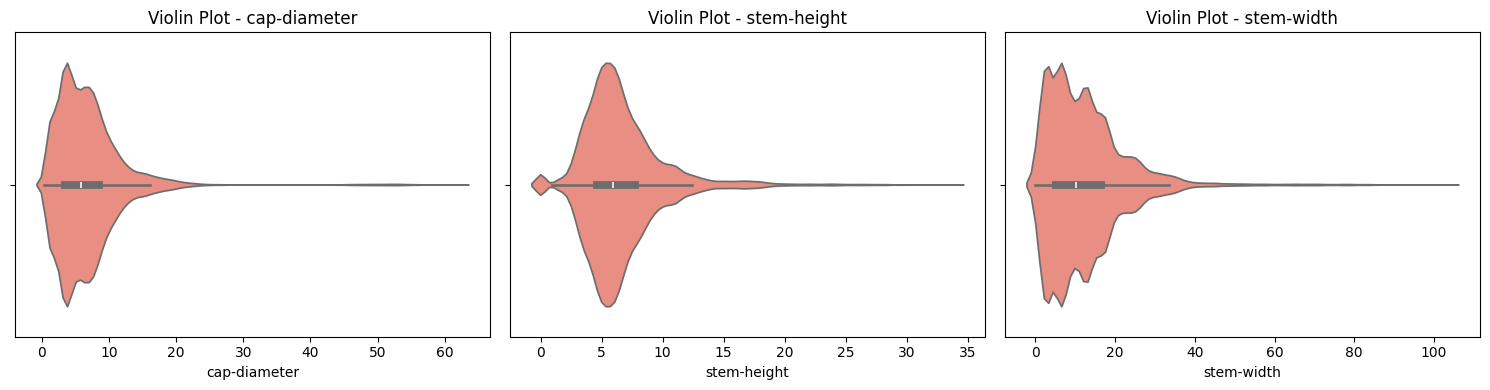

In [ ]:
plt.figure(figsize=(15, 4))
for i, feature in enumerate(quant_features):
    plt.subplot(1, 3, i + 1)
    sns.violinplot(data=df, x=feature, color='salmon')
    plt.title(f'Violin Plot - {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

### **B. Categorical and binary features**

**Frequency table**

In [ ]:
category = df.drop(["cap-diameter", "stem-height", "stem-width"], axis = 1)

# Loop melalui setiap kolom dalam 'category' DataFrame
for column in category.columns:
    # Hitung frekuensi setiap nilai dalam kolom
    frequency_table = df[column].value_counts().reset_index()
    frequency_table.columns = [column, 'Frequency']

    # Tampilkan tabel frekuensi
    print(f"Frequency Table for {column}:")
    display(frequency_table)  # Menggunakan display untuk output yang lebih rapi di Colab
    print("\n")

Frequency Table for class:


,class,Frequency
0,poisonous,33742
1,edible,27181




Frequency Table for cap-shape:


,cap-shape,Frequency
0,convex,26932
1,flat,13404
2,sunken,7164
3,bell,5694
4,others,3316
5,spherical,2598
6,conical,1815




Frequency Table for cap-surface:


,cap-surface,Frequency
0,sticky,22304
1,smooth,7580
2,scaly,6341
3,shiny,4974
4,grooves,4722
5,d,4432
6,fleshy,2584
7,silky,2303
8,fibrous,2225
9,wrinkled,2150




Frequency Table for cap-color:


,cap-color,Frequency
0,brown,24205
1,yellow,8541
2,white,7649
3,gray,4312
4,red,4035
5,orange,3653
6,green,1779
7,purple,1709
8,pink,1703
9,black,1279




Frequency Table for does-bruise-or-bleed:


,does-bruise-or-bleed,Frequency
0,no,50333
1,bruises,10590




Frequency Table for gill-attachment:


,gill-attachment,Frequency
0,adnate,22552
1,decurrent,10247
2,adnexed,7413
3,pores,6001
4,free,5648
5,sinuate,5648
6,none,3414




Frequency Table for gill-spacing:


,gill-spacing,Frequency
0,close,49744
1,distant,7765
2,none,3414




Frequency Table for gill-color:


,gill-color,Frequency
0,white,18492
1,brown,9645
2,yellow,9545
3,pink,5983
4,gray,4118
5,none,3414
6,orange,2909
7,black,2375
8,green,1399
9,red,1066




Frequency Table for stem-color:


,stem-color,Frequency
0,white,22926
1,brown,18063
2,yellow,7864
3,gray,2626
4,orange,2187
5,red,2049
6,purple,1490
7,pink,1025
8,none,915
9,black,837




Frequency Table for has-ring:


,has-ring,Frequency
0,none,45756
1,ring,15167




Frequency Table for ring-type:


,ring-type,Frequency
0,none,50686
1,evanescent,2435
2,zone,2118
3,large,1427
4,flaring,1399
5,pendant,1265
6,grooved,1240
7,movable,353




Frequency Table for habitat:


,habitat,Frequency
0,woods,44063
1,grasses,7943
2,leaves,3168
3,meadows,2920
4,heaths,2001
5,paths,360
6,waste,353
7,urban,115




Frequency Table for season:


,season,Frequency
0,autumn,30141
1,summer,22850
2,winter,5233
3,spring,2699


**Bar plot**

<ipython-input-24-a0a52bc54453>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(new_labels)


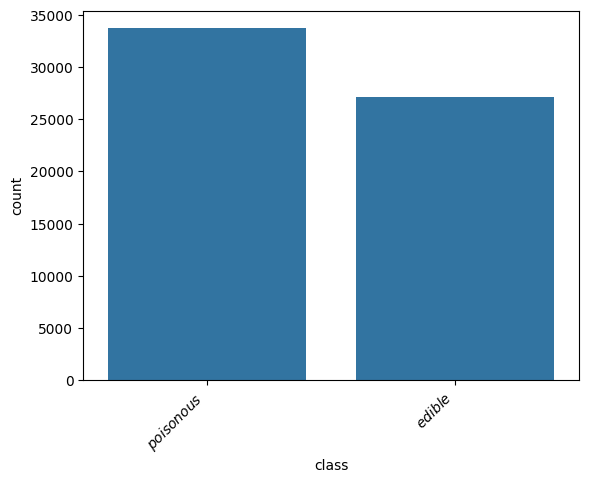

<ipython-input-24-a0a52bc54453>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(new_labels)


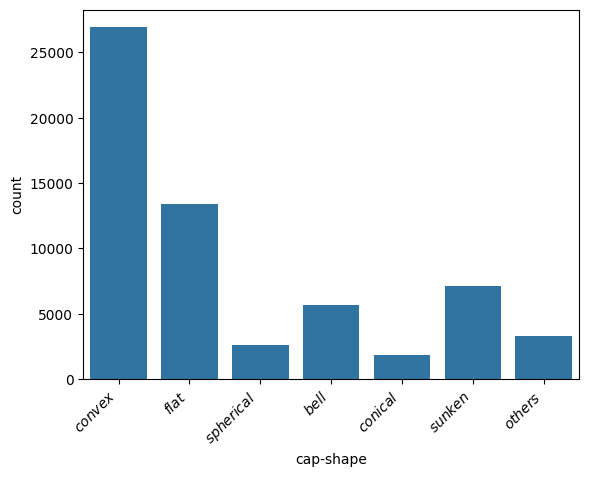

<ipython-input-24-a0a52bc54453>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(new_labels)


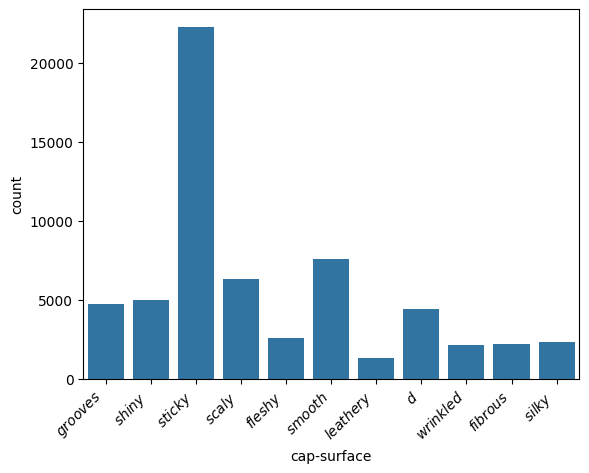

<ipython-input-24-a0a52bc54453>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(new_labels)


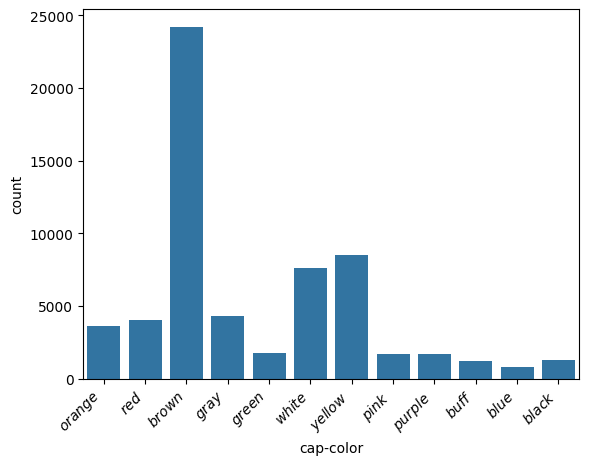

<ipython-input-24-a0a52bc54453>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(new_labels)


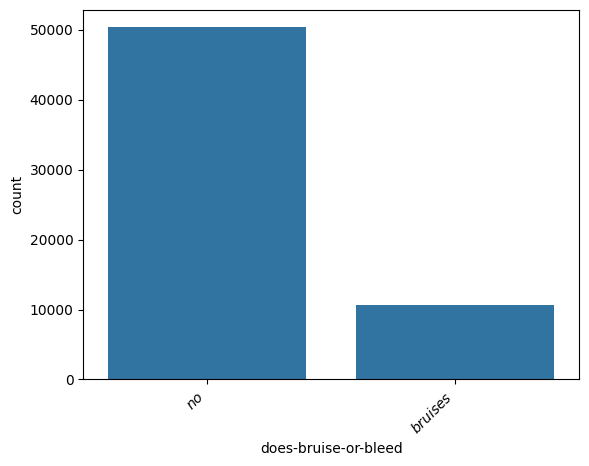

<ipython-input-24-a0a52bc54453>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(new_labels)


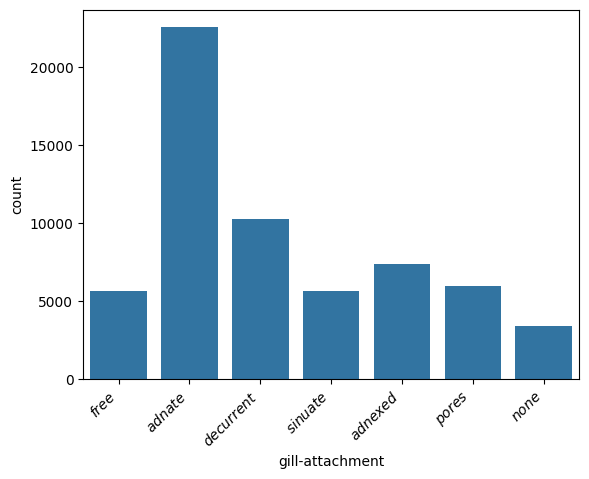

<ipython-input-24-a0a52bc54453>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(new_labels)


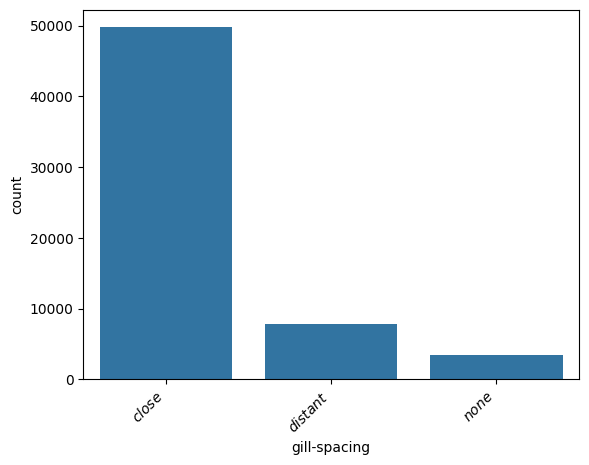

<ipython-input-24-a0a52bc54453>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(new_labels)


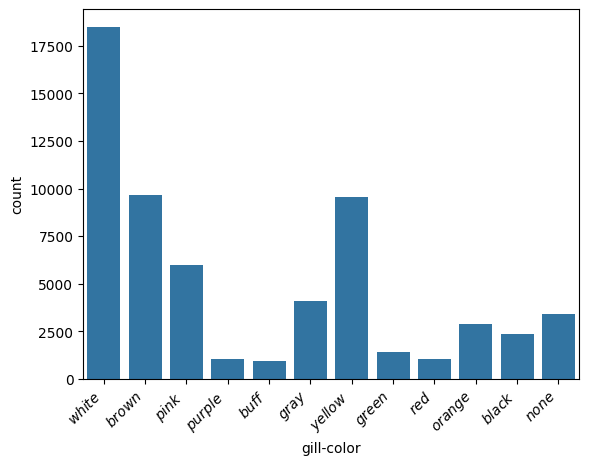

<ipython-input-24-a0a52bc54453>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(new_labels)


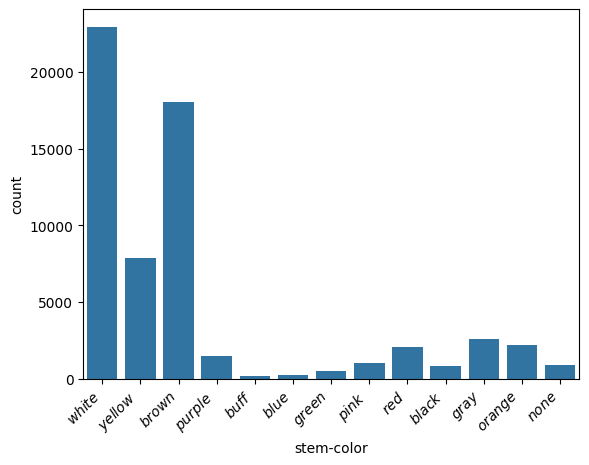

<ipython-input-24-a0a52bc54453>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(new_labels)


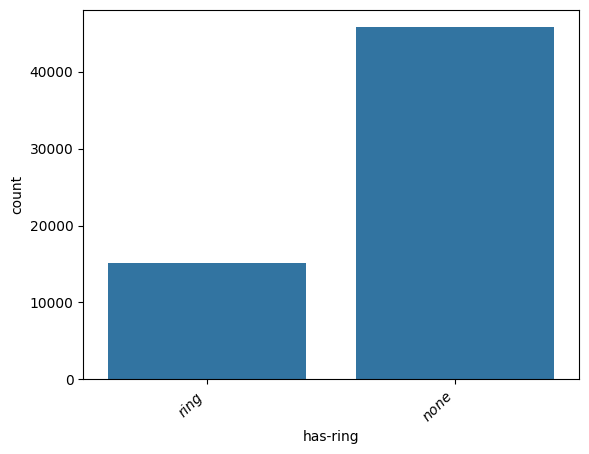

<ipython-input-24-a0a52bc54453>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(new_labels)


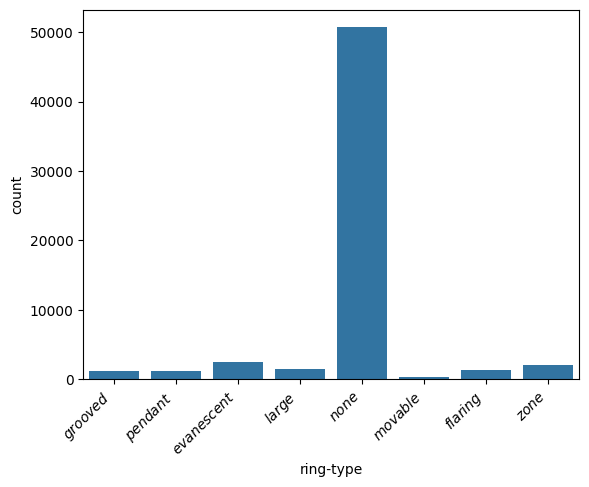

<ipython-input-24-a0a52bc54453>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(new_labels)


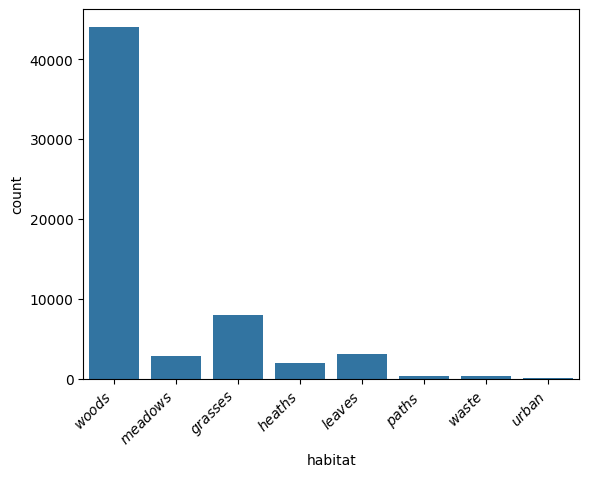

<ipython-input-24-a0a52bc54453>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(new_labels)


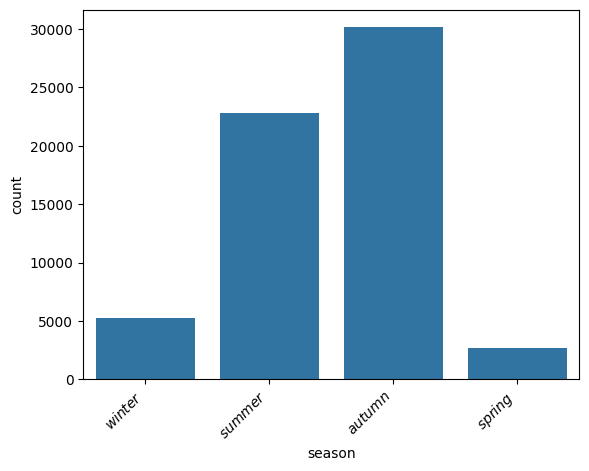

In [ ]:
category = df.drop(["cap-diameter", "stem-height", "stem-width"], axis=1)

for i in category.columns:
    sns.countplot(x=i, data=category)
    plt.xticks(rotation=45, ha='right')  # Rotasi dan alignment label

    # Membuat label menjadi miring
    labels = [item.get_text() for item in plt.gca().get_xticklabels()]

    new_labels = [r'$\it{' + label + '}$' for label in labels] #Italic

    plt.gca().set_xticklabels(new_labels)
    plt.show()

## **2. Multivariate Visualization**

### **A. Quantitative vs. Quantitative**

**Correlation Matrix**

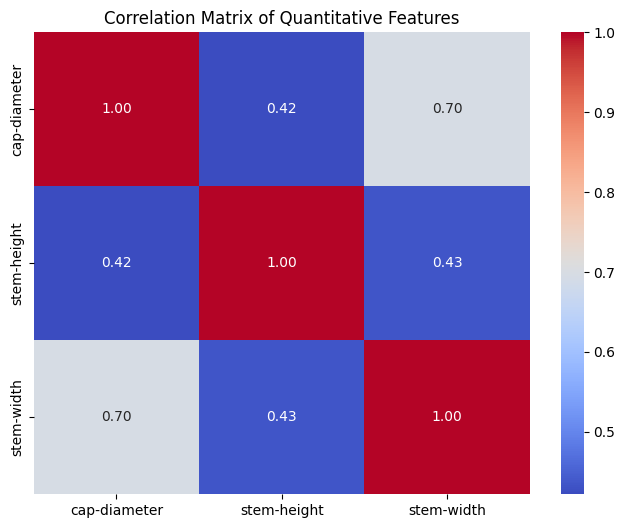

In [ ]:
correlation_matrix = df[['cap-diameter', 'stem-height', 'stem-width']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Quantitative Features')
plt.show()

**Scatterplot**

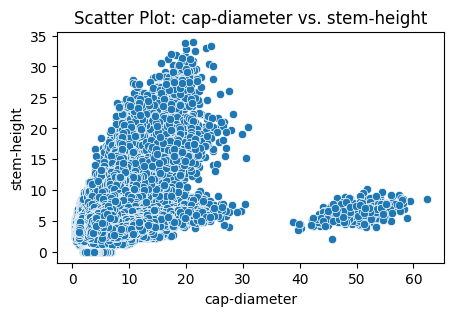

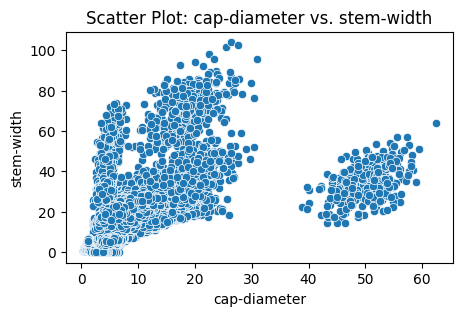

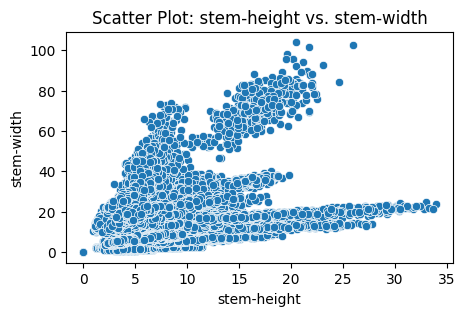

In [ ]:
quant_features = ['cap-diameter', 'stem-height', 'stem-width']

# Loop through each pair of quantitative features
for i in range(len(quant_features)):
    for j in range(i + 1, len(quant_features)):
        feature1 = quant_features[i]
        feature2 = quant_features[j]

        # Create scatter plot
        plt.figure(figsize=(5, 3))  # Adjust figure size as needed
        sns.scatterplot(x=feature1, y=feature2, data=df)
        plt.title(f'Scatter Plot: {feature1} vs. {feature2}')
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.show()

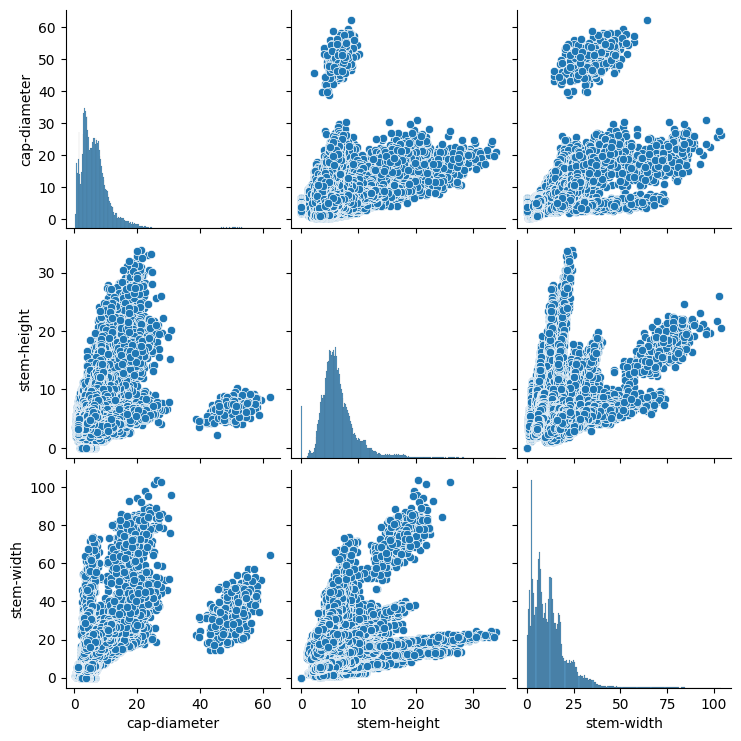

In [ ]:
# Scatterplot Matrix
numerical = df[['cap-diameter', 'stem-height', 'stem-width']]
%config InlineBackend.figure_format = 'png'
sns.pairplot(numerical);

### **B. Quantitative vs. Categorical**

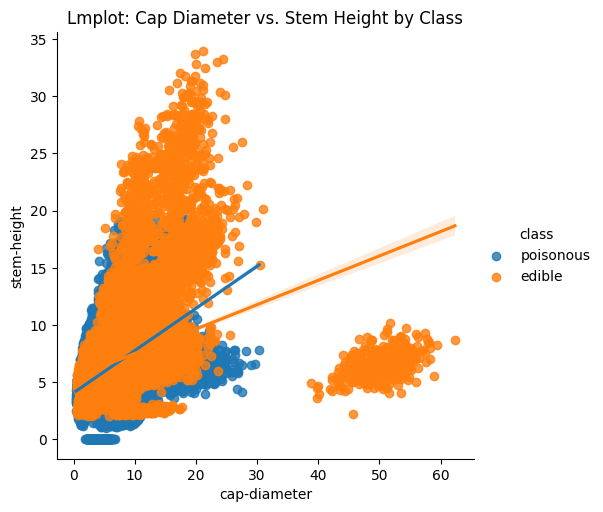

In [ ]:
# Lmplot
sns.lmplot(x='cap-diameter', y='stem-height', hue='class', data=df)
plt.title('Lmplot: Cap Diameter vs. Stem Height by Class')
plt.show()

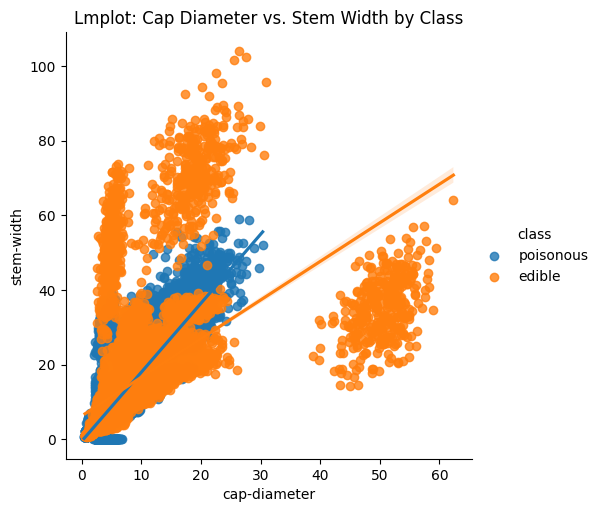

In [ ]:
# Lmplot
sns.lmplot(x='cap-diameter', y='stem-width', hue='class', data=df)
plt.title('Lmplot: Cap Diameter vs. Stem Width by Class')
plt.show()

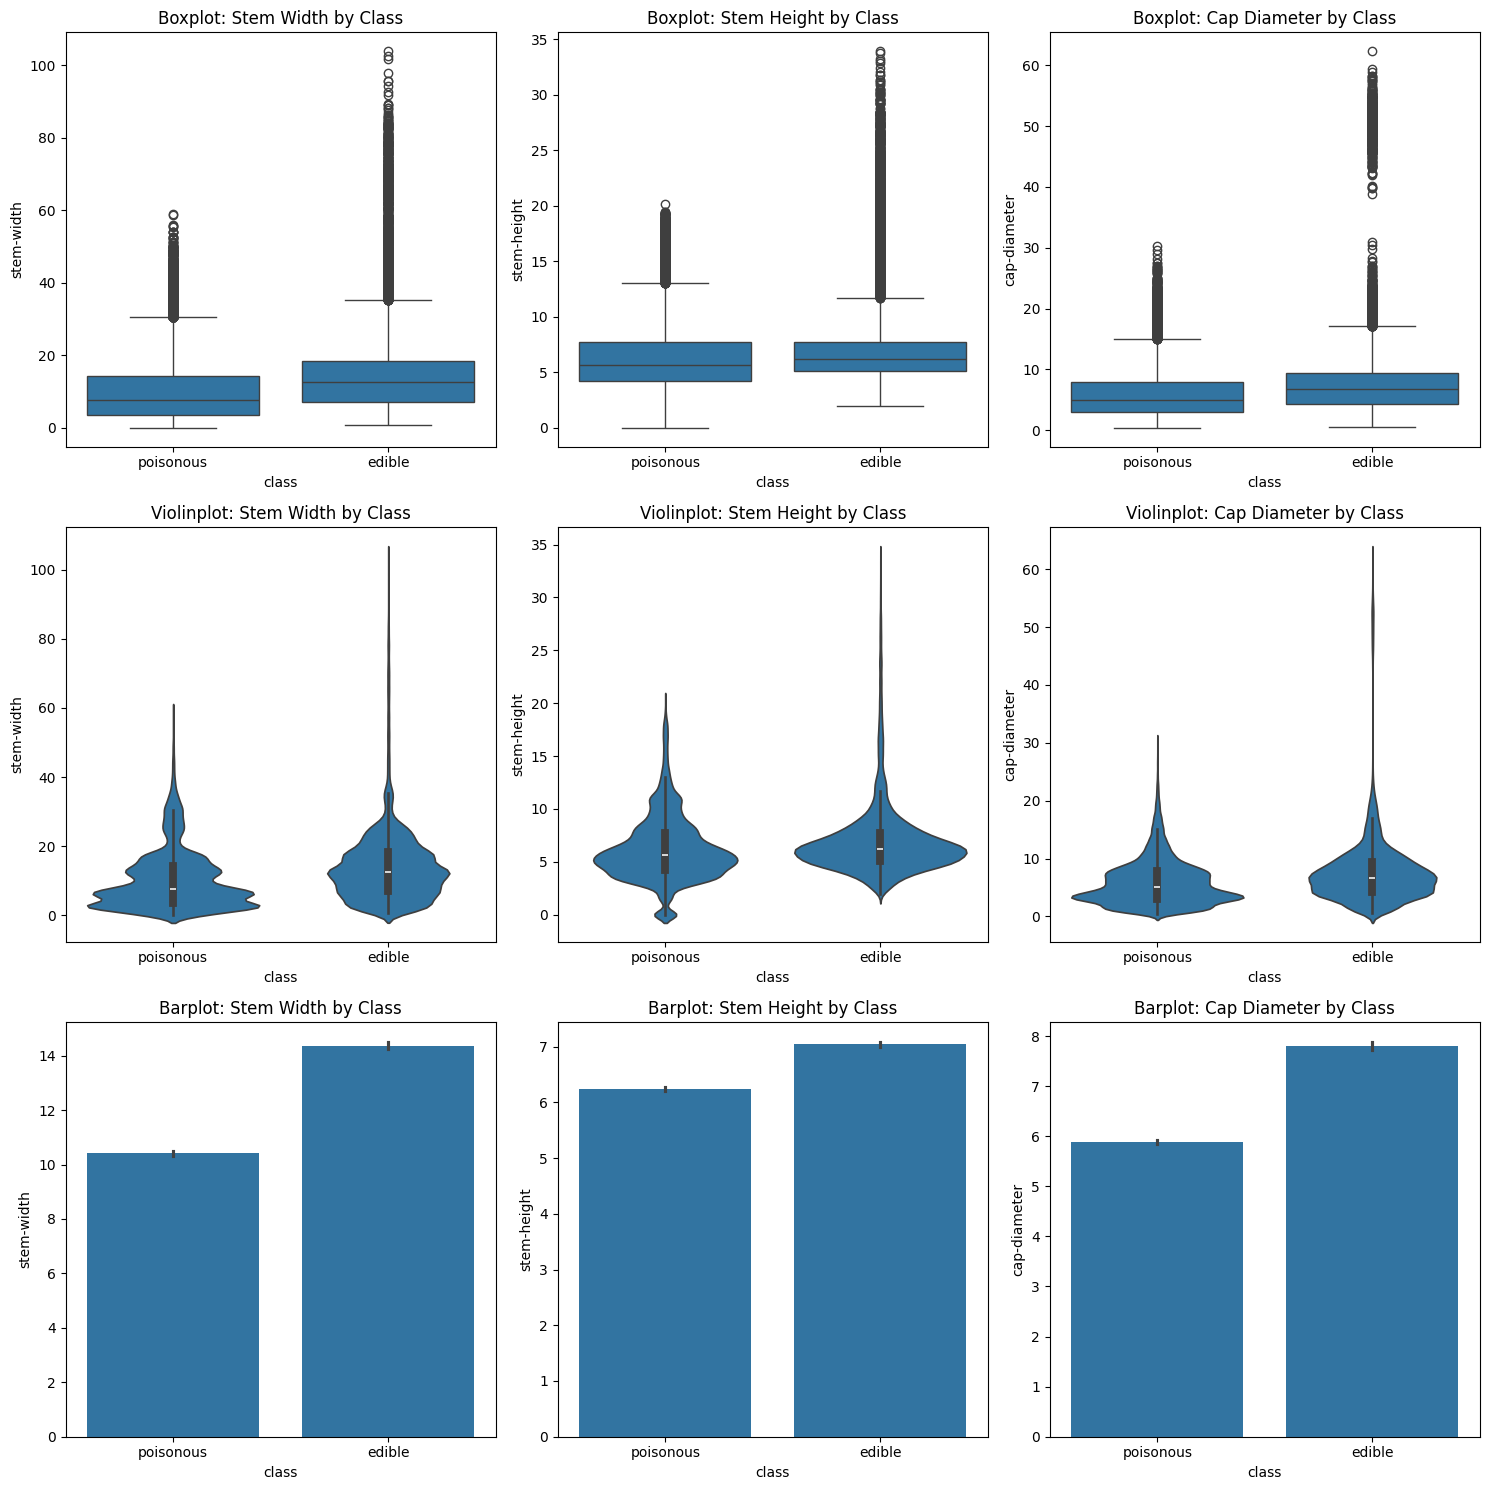

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Boxplots
sns.boxplot(x='class', y='stem-width', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot: Stem Width by Class')

sns.boxplot(x='class', y='stem-height', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot: Stem Height by Class')

sns.boxplot(x='class', y='cap-diameter', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Boxplot: Cap Diameter by Class')

# Violinplots
sns.violinplot(x='class', y='stem-width', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Violinplot: Stem Width by Class')

sns.violinplot(x='class', y='stem-height', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Violinplot: Stem Height by Class')

sns.violinplot(x='class', y='cap-diameter', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Violinplot: Cap Diameter by Class')

# Barplots
sns.barplot(x='class', y='stem-width', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Barplot: Stem Width by Class')

sns.barplot(x='class', y='stem-height', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Barplot: Stem Height by Class')

sns.barplot(x='class', y='cap-diameter', data=df, ax=axes[2, 2])
axes[2, 2].set_title('Barplot: Cap Diameter by Class')

plt.tight_layout()
plt.show()

### **C. Categorical vs. Categorical**

In [ ]:
def plot_col(col, color= ['red', 'lightblue'], labels = None, hue = None):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(x=col, palette=color, data=df, ax=ax, hue = hue)
    ax.set(title = f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}", ylabel="Quantity")

<ipython-input-28-7d2d29e3b28c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, palette=color, data=df, ax=ax, hue = hue)


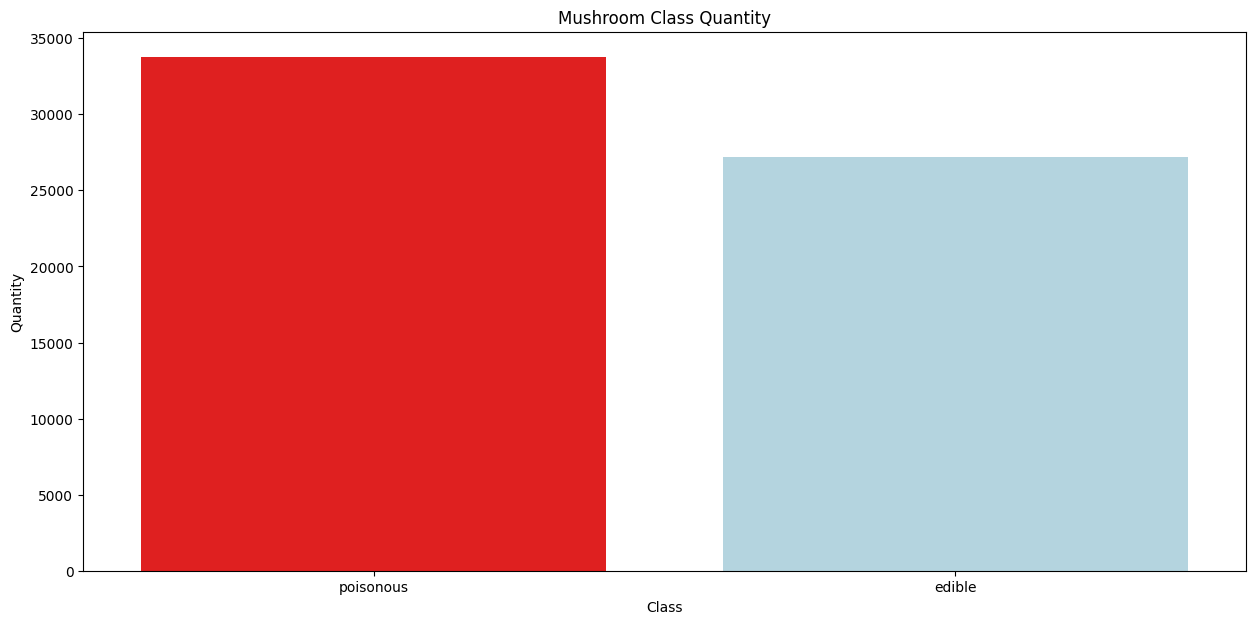

In [ ]:
class_dict = ('Poisonous', 'Edible')
plot_col(col='class', labels=class_dict)

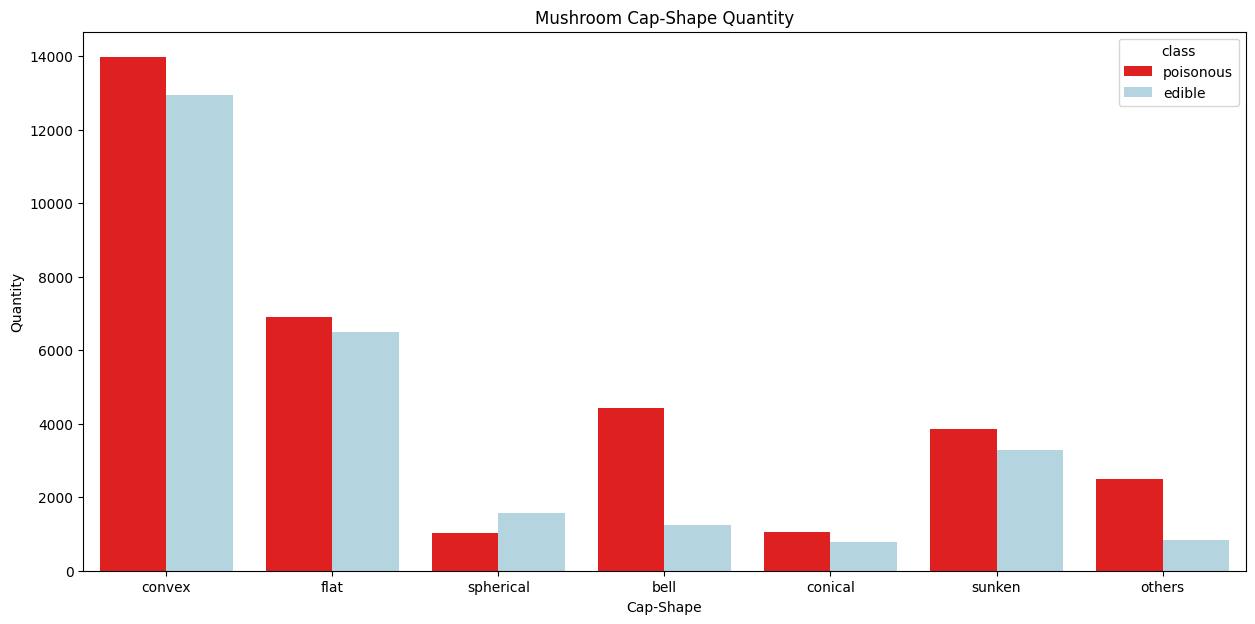

In [ ]:
labels = ('convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical')
plot_col(col='cap-shape', hue='class', labels=cap_shape)

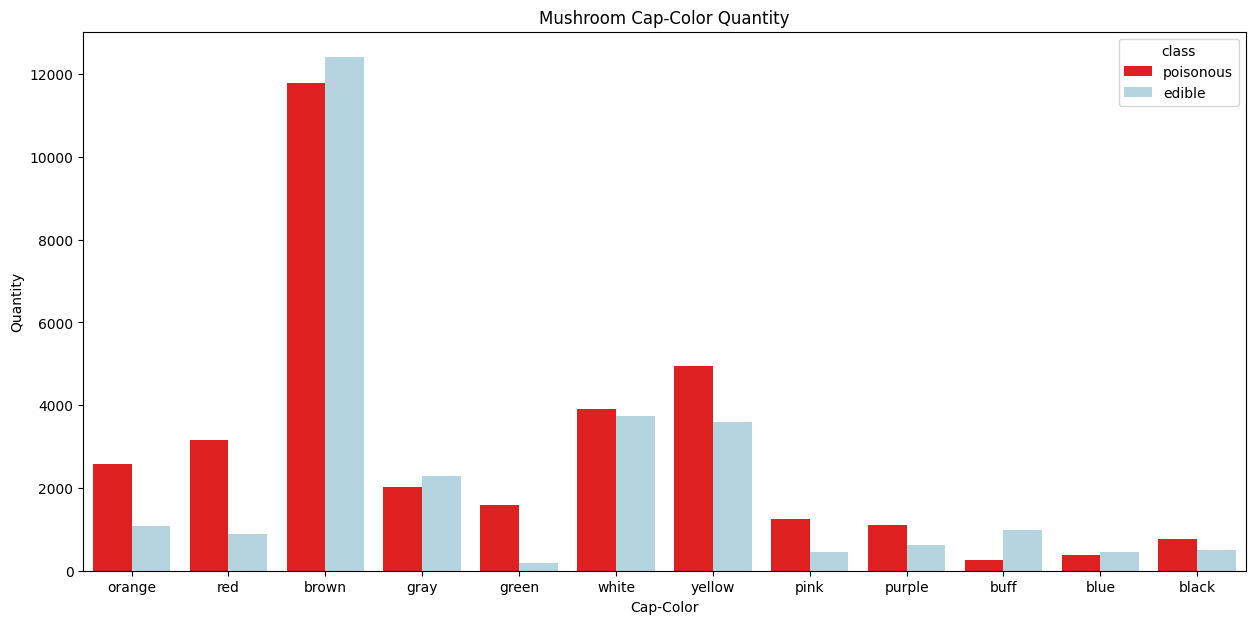

In [ ]:
plot_col(col='cap-color', hue='class', labels=cap_color)

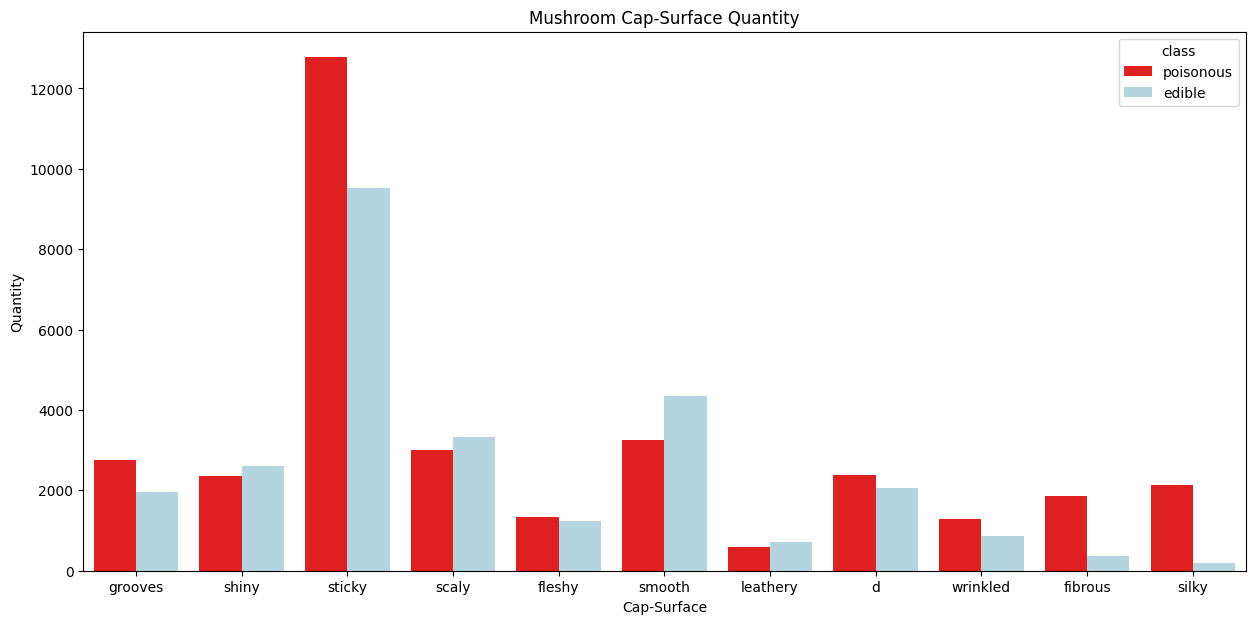

In [ ]:
plot_col(col='cap-surface', hue='class', labels=cap_surface)

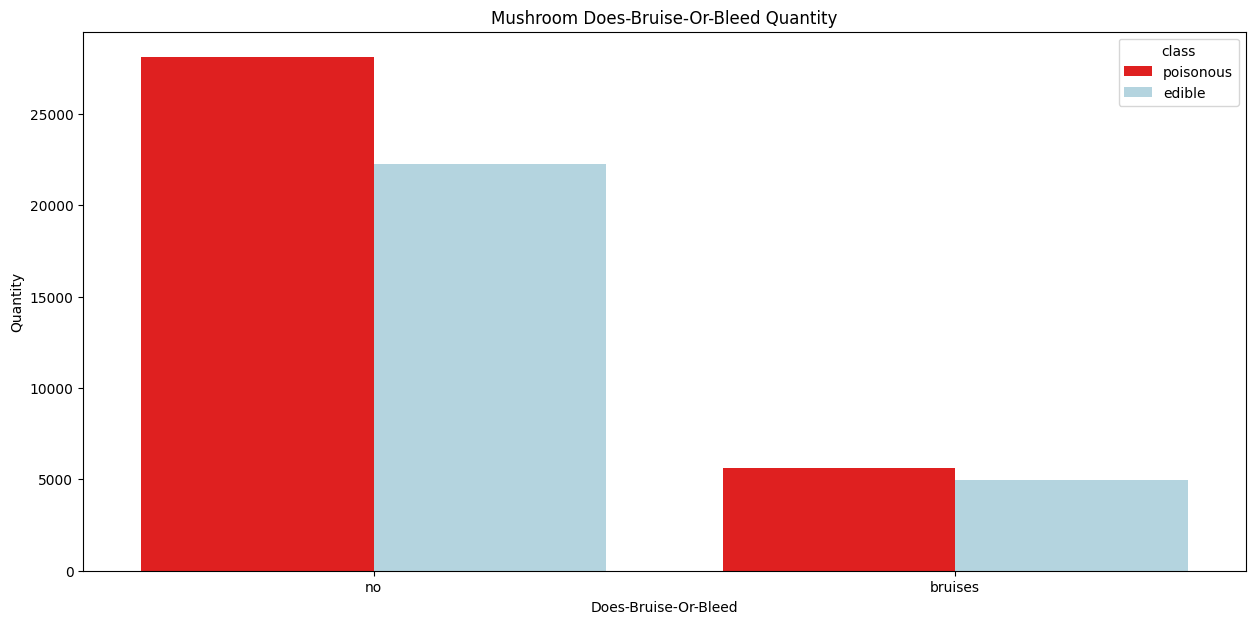

In [ ]:
plot_col(col='does-bruise-or-bleed', hue='class')

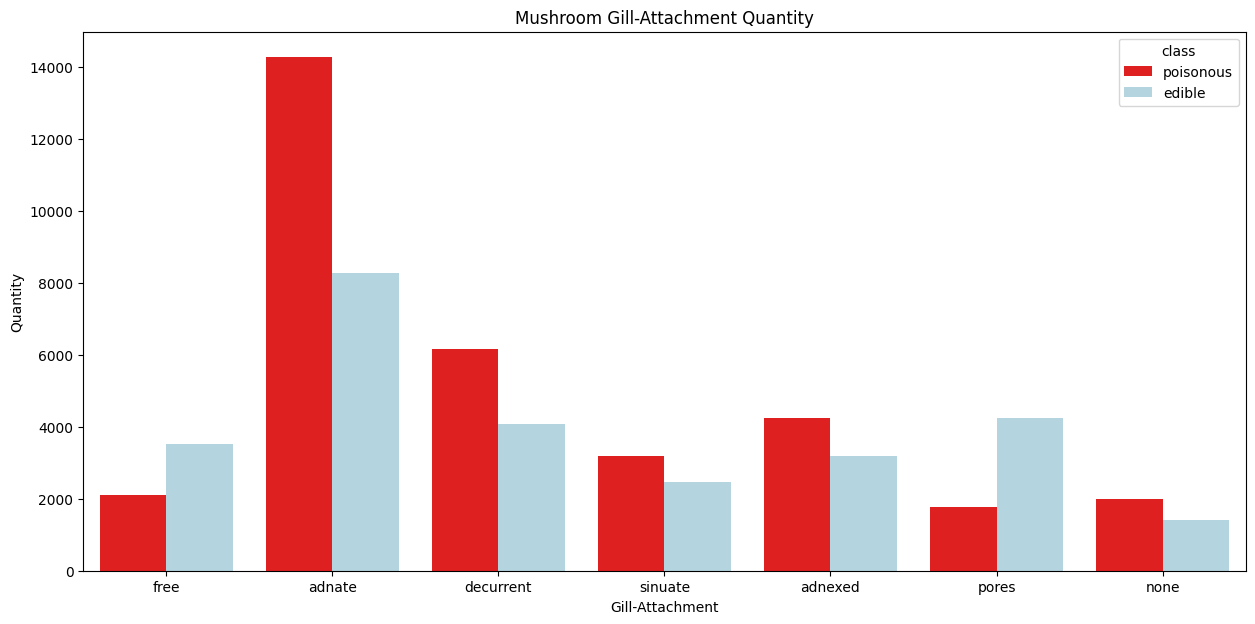

In [ ]:
plot_col(col='gill-attachment', hue='class')

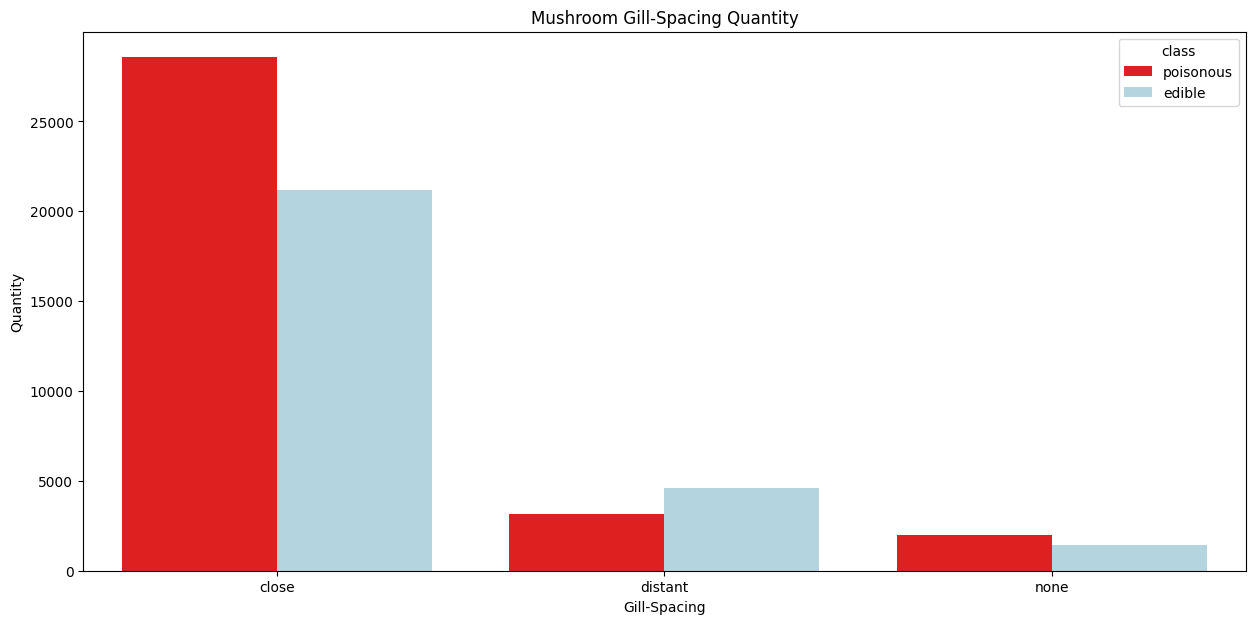

In [ ]:
plot_col(col='gill-spacing', hue='class')

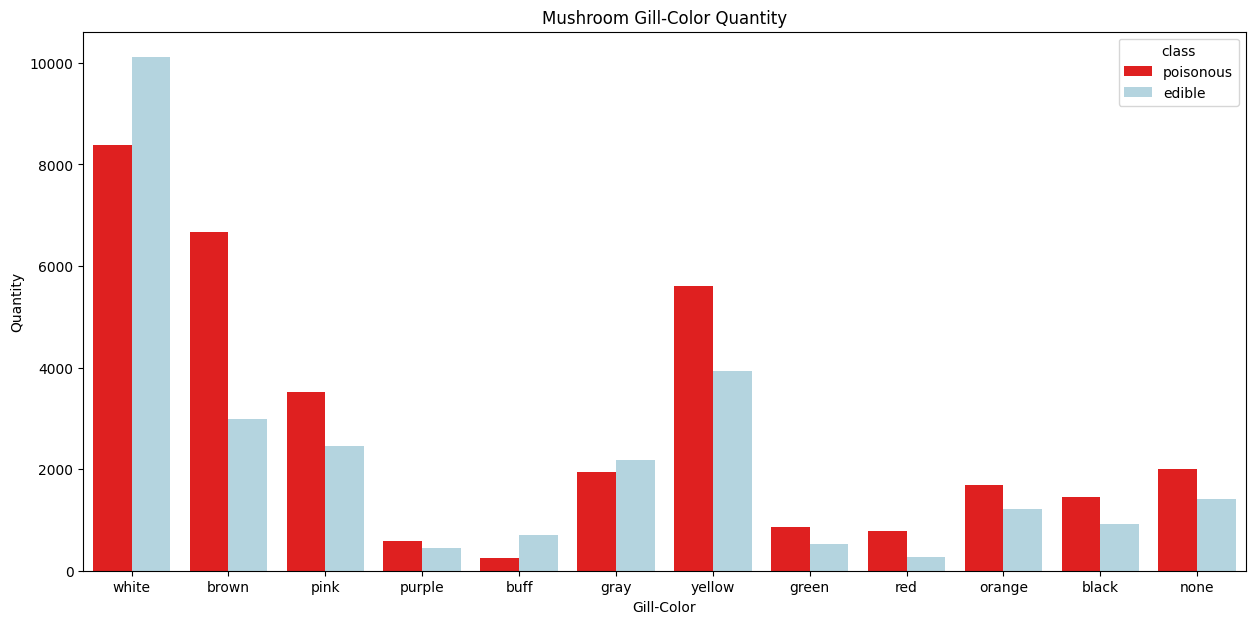

In [ ]:
plot_col(col='gill-color', hue='class')

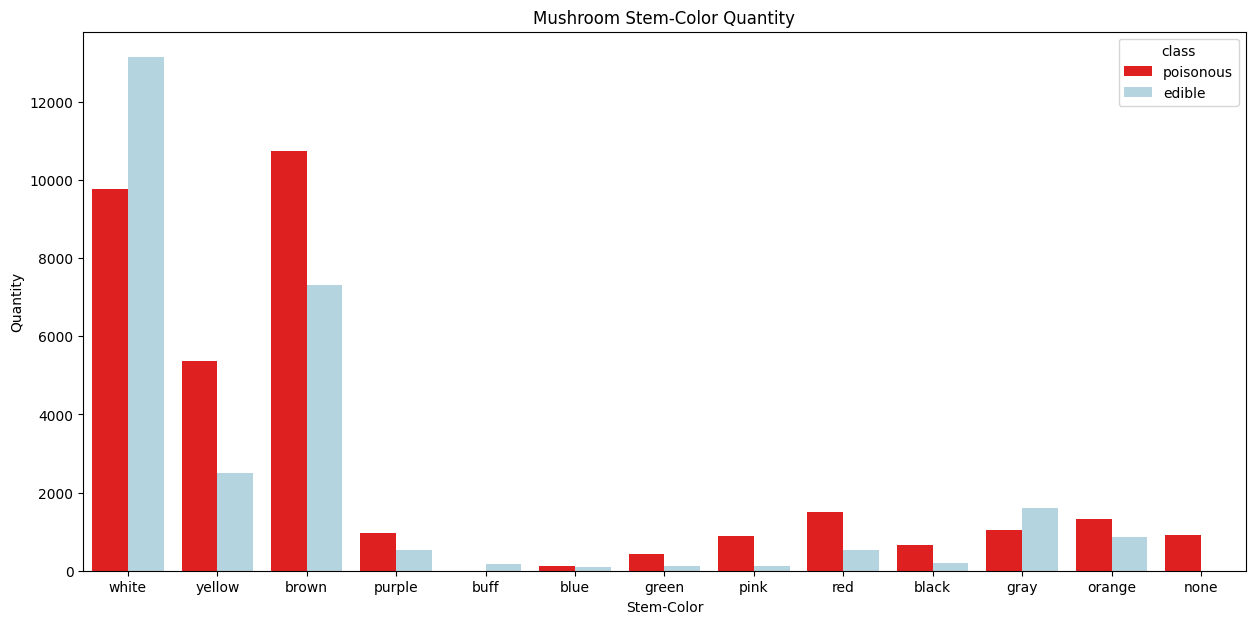

In [ ]:
plot_col(col='stem-color', hue='class')

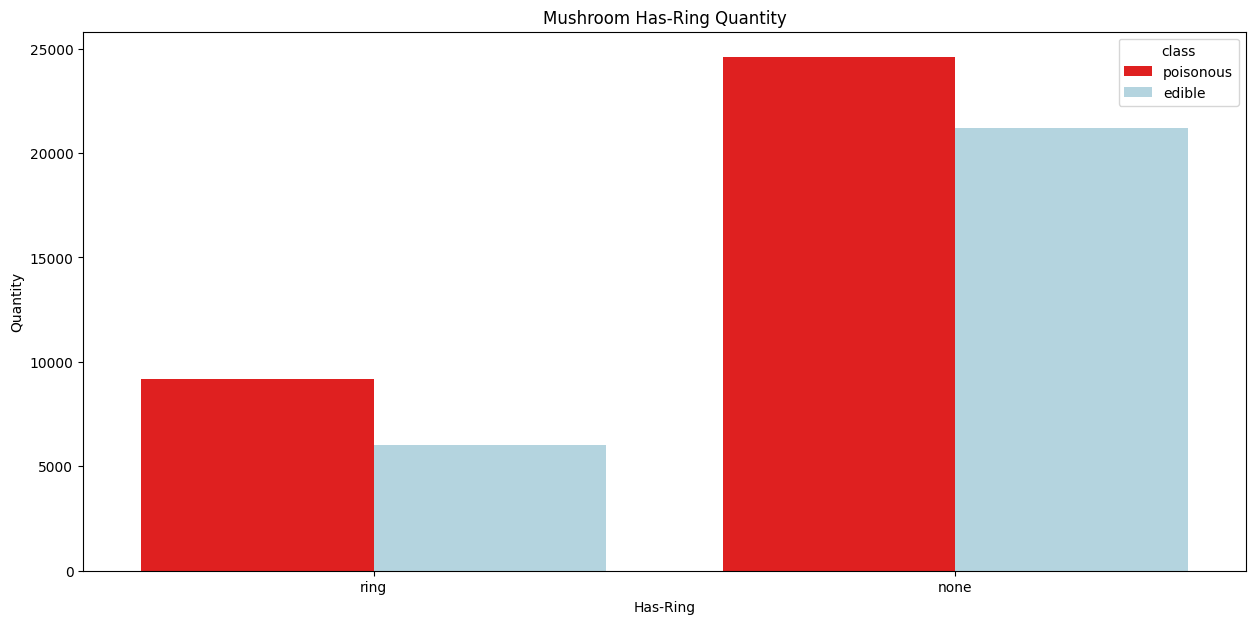

In [ ]:
plot_col(col='has-ring', hue='class')

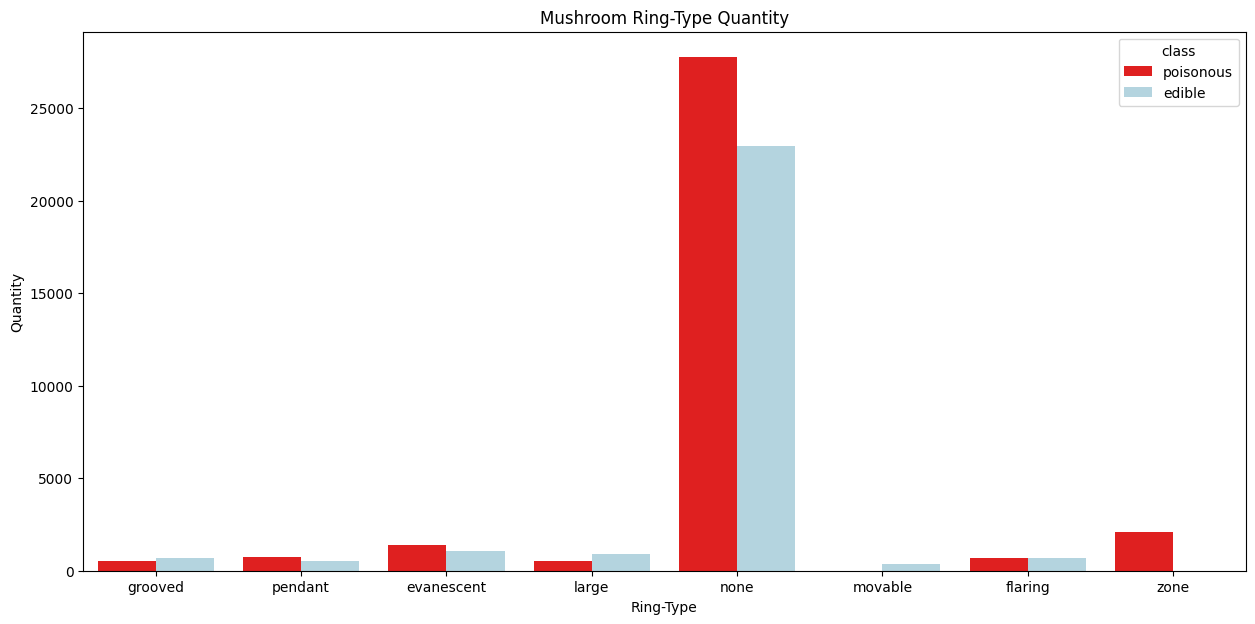

In [ ]:
plot_col(col='ring-type', hue='class')

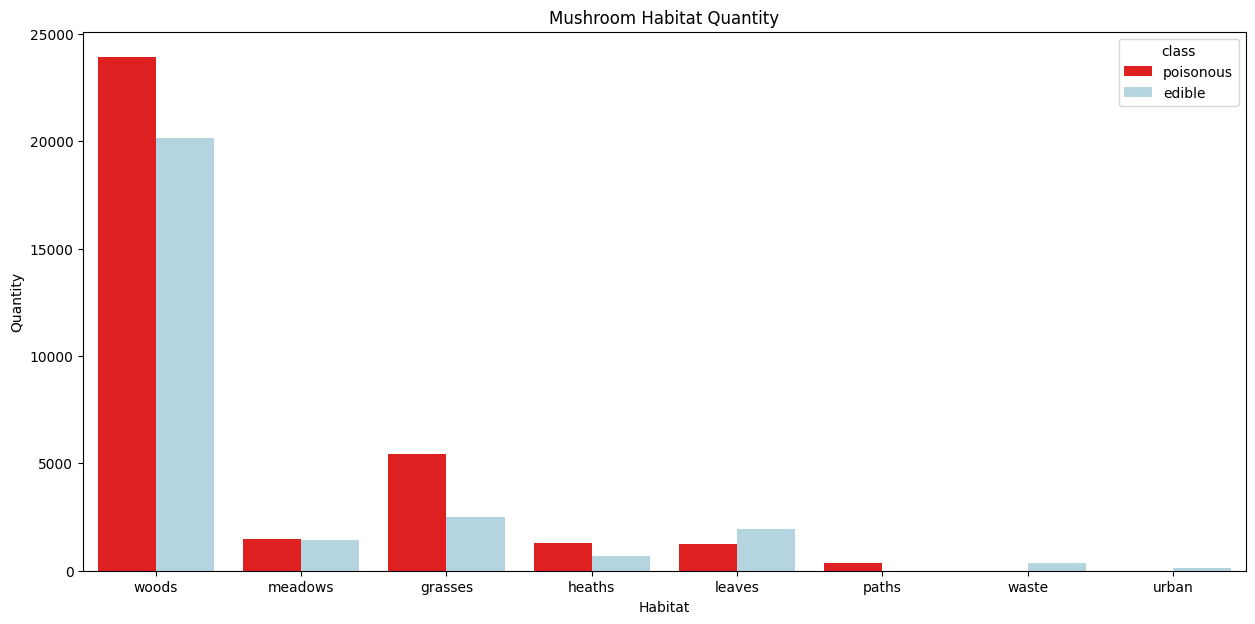

In [ ]:
plot_col(col='habitat', hue='class', labels=season)

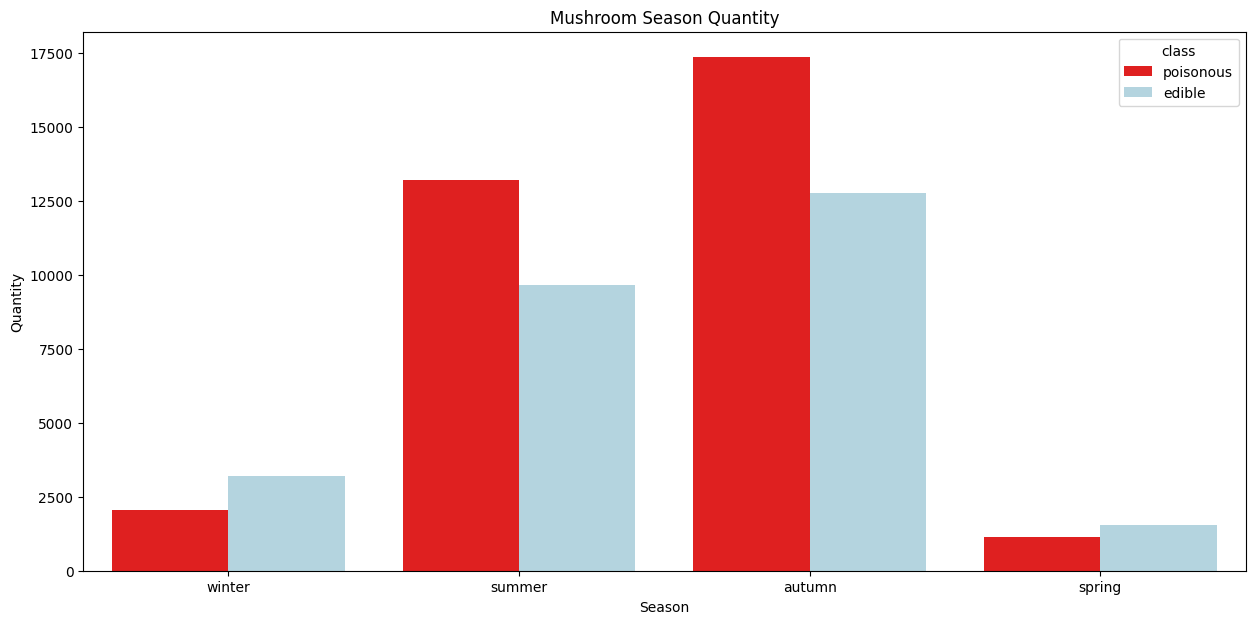

In [ ]:
plot_col(col='season', hue='class', labels=season)